# K-Nearest Neighbours – Adult Income Classification

## Overview

This notebook is designed as a hands-on coding challenge for beginners. You'll implement your own k-NN classifier to predict whether someone's annual income exceeds $50K.

**Goal Question:** Can we predict whether someone's annual income exceeds $50K based on their personal and work attributes?

## About the Dataset

**Data Source:** [Income Dataset from Kaggle](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

### Dataset Details:
- **Total samples:** 32,561 adults
- **Features:** 14 attributes (mix of numerical and categorical)
- **Target:** Income bracket (≤50K or >50K)
- **Real-world application:** Economic analysis, policy making, demographic studies

### Features in Our Dataset:

| Feature | Description | Type | Example Values |
|---------|-------------|------|----------------|
| **age** | Age in years | Numerical | 25, 38, 44 |
| **workclass** | Employment type | Categorical | Private, Self-emp, Gov |
| **fnlwgt** | Census sampling weight | Numerical | 226802, 89814 |
| **education** | Education level | Categorical | HS-grad, Bachelors, Masters |
| **educational-num** | Education years | Numerical | 9, 13, 16 |
| **marital-status** | Marital status | Categorical | Married, Single, Divorced |
| **occupation** | Job type | Categorical | Tech-support, Craft-repair |
| **relationship** | Family relationship | Categorical | Husband, Wife, Own-child |
| **race** | Race | Categorical | White, Black, Asian-Pac-Islander |
| **gender** | Gender | Categorical | Male, Female |
| **capital-gain** | Capital gains | Numerical | 0, 7688, 3103 |
| **capital-loss** | Capital losses | Numerical | 0, 1848, 323 |
| **hours-per-week** | Work hours per week | Numerical | 40, 50, 30 |
| **native-country** | Country of origin | Categorical | United-States, Mexico, India |

**Target Variable:** `income` - Income bracket (≤50K or >50K)

## What You'll Learn

Through this exercise, you will:
- Handle missing values in real-world data
- Encode categorical variables for machine learning
- Apply feature scaling for k-NN
- Implement k-NN classification with hyperparameter tuning
- Evaluate binary classification with confusion matrix
- Understand precision, recall, and class imbalance

## Instructions



💡 **Key Reminders:**
- This is a **binary classification** problem (2 classes: ≤50K, >50K)
- k-NN requires **feature scaling** - very important!
- Use **confusion matrix** as your primary evaluation metric
- Handle **missing values** (marked as '?' in the dataset)
- **Encode categorical variables** before using k-NN

Let's begin!

# Import Packages

In [ ]:
# Comment out if not required
%pip install -r requirements.txt

In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Data/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Attribute Information:
 1. age: continuous.
 2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 3. fnlwgt: continuous.
 4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
 5. education-num: continuous.
 6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving,   Priv-house-serv, Protective-serv, Armed-Forces.
 8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 10. sex: Female, Male.
 11. capital-gain: continuous.
 12. capital-loss: continuous.
 13. hours-per-week: continuous.
 14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 class: >50K, <=50K

### Notes for Delve
1. One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.
2. Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.
3. The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.

In [4]:
print(data.shape)

(48842, 15)


In [5]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### Replacing ? with Nan 

In [6]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [7]:
# Robust EDA Summary Function
def eda_summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generate a clean EDA summary for mixed-type DataFrames.
    """
    summary = pd.DataFrame({
        "DataType": df.dtypes,
        "IsNull": df.isnull().sum(),
        "IsNa": df.isna().sum(),
        "Unique": df.nunique(),
    })

    # Numeric stats
    numeric_cols = df.select_dtypes(include="number").columns
    summary["Min"] = pd.NA
    summary["Max"] = pd.NA
    summary["Mean"] = pd.NA

    summary.loc[numeric_cols, "Min"] = df[numeric_cols].min()
    summary.loc[numeric_cols, "Max"] = df[numeric_cols].max()
    summary.loc[numeric_cols, "Mean"] = df[numeric_cols].mean()

    # Duplicate rows (global, not per-column)
    summary["DuplicateRows"] = df.duplicated().sum()

    return summary

info = eda_summary(data)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
DataType,int64,object,int64,object,int64,object,object,object,object,object,int64,int64,int64,object,object
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
IsNa,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2
Min,17,<NA>,12285,<NA>,1,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,1,<NA>,<NA>
Max,90,<NA>,1490400,<NA>,16,<NA>,<NA>,<NA>,<NA>,<NA>,99999,4356,99,<NA>,<NA>
Mean,38.643585,<NA>,189664.134597,<NA>,10.078089,<NA>,<NA>,<NA>,<NA>,<NA>,1079.067626,87.502314,40.422382,<NA>,<NA>
DuplicateRows,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52


results:
1. no null or Nan Value.but the dataset is not using the default nan string for missing values, instead "?" is used. after convert '?' to Nan three columns ['workclass','occupation','native-country] have nan
2. there are 52 duplicated row.


In [8]:
df = data.copy()

## Remove nan value

In [9]:
df.dropna(how='any',inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
df.shape

(45222, 15)

## Remove Duplicated

In [11]:
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# remove educational-num, capital-gain, capital-loss

#### Check 'education' & 'educational-num' columns

In [12]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [13]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

* As we can see, 'education' & 'educational-num' both columns have similer values.
* 'education' has string values
* 'educational-num' has numerical values
* all HS-grad from education represents 9 in education-num
* all Masters from education represents 14 in education-num and likewise.
* Both columns conveying same information
* So, we can remove 'education-num' colum

#### Drop capital-gain, and capital-loss columns¶


Text(0.5, 1.0, 'Histogram')

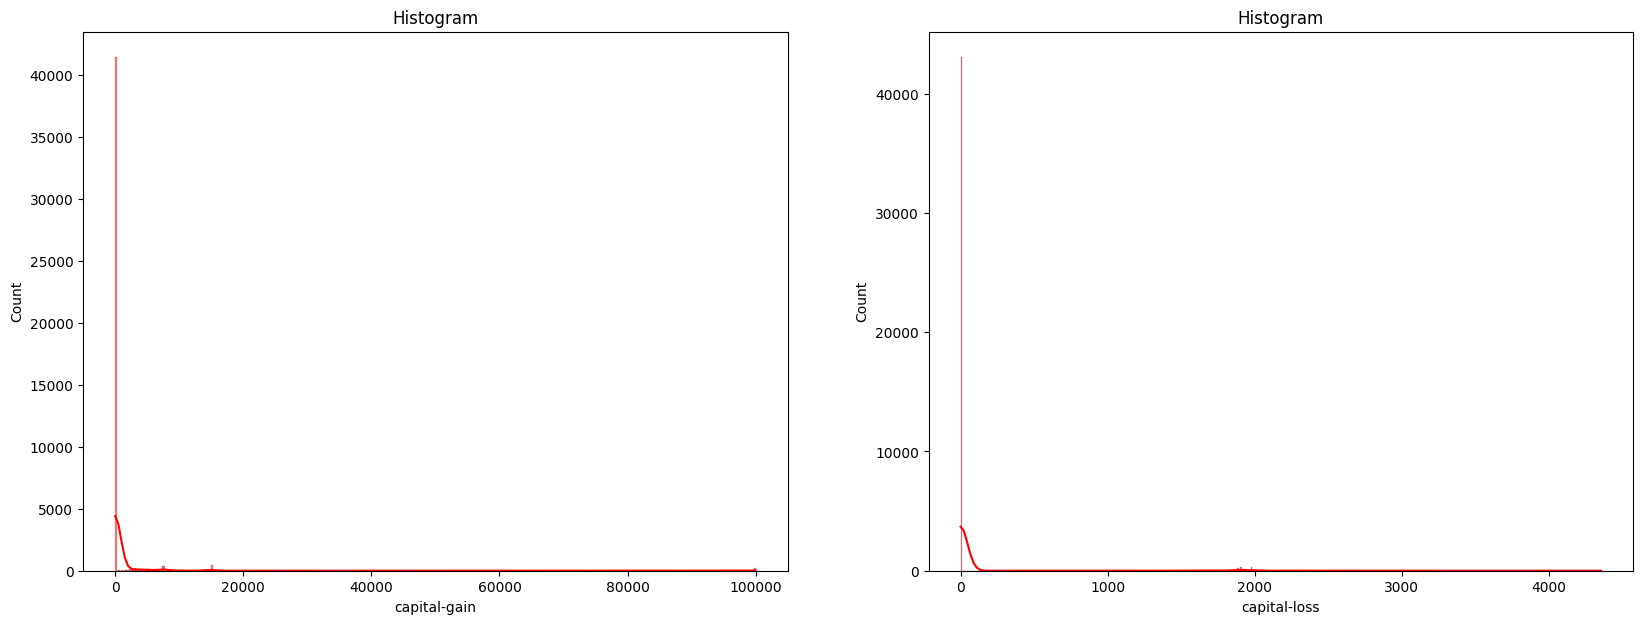

In [14]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

[ 'capital-gain' ] & [ 'capital-loss' ] both columns have 75% data as 0.00
So, we can drop [ 'capital-gain' ] & [ 'capital-loss' ] both columns

In [15]:
df1 = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)

### Convert categorical (text) columns into numeric values

In [16]:
label_encoder = preprocessing.LabelEncoder()

df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['workclass'] = label_encoder.fit_transform(df1['workclass'])
df1['education'] = label_encoder.fit_transform(df1['education'])
df1['marital-status'] = label_encoder.fit_transform(df1['marital-status'])
df1['occupation'] = label_encoder.fit_transform(df1['occupation'])
df1['relationship'] = label_encoder.fit_transform(df1['relationship'])
df1['race'] = label_encoder.fit_transform(df1['race'])
df1['native-country'] = label_encoder.fit_transform(df1['native-country'])
df1['income'] = label_encoder.fit_transform(df1['income'])

In [17]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:
# Check For Missing Values
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df1.isna().sum(),True)
info.insert(2,"Duplicate",df1.duplicated().sum(),True)
info.insert(3,"Unique",df1.nunique(),True)
info.insert(4,"Min",df1.min(),True)
info.insert(5,"Max",df1.max(),True)
info.T    


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,8,8,8,8,8,8,8,8,8,8,8,8
Unique,74,7,26741,16,7,14,6,5,2,96,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,0
Max,90,6,1490400,15,6,13,5,4,1,99,40,1


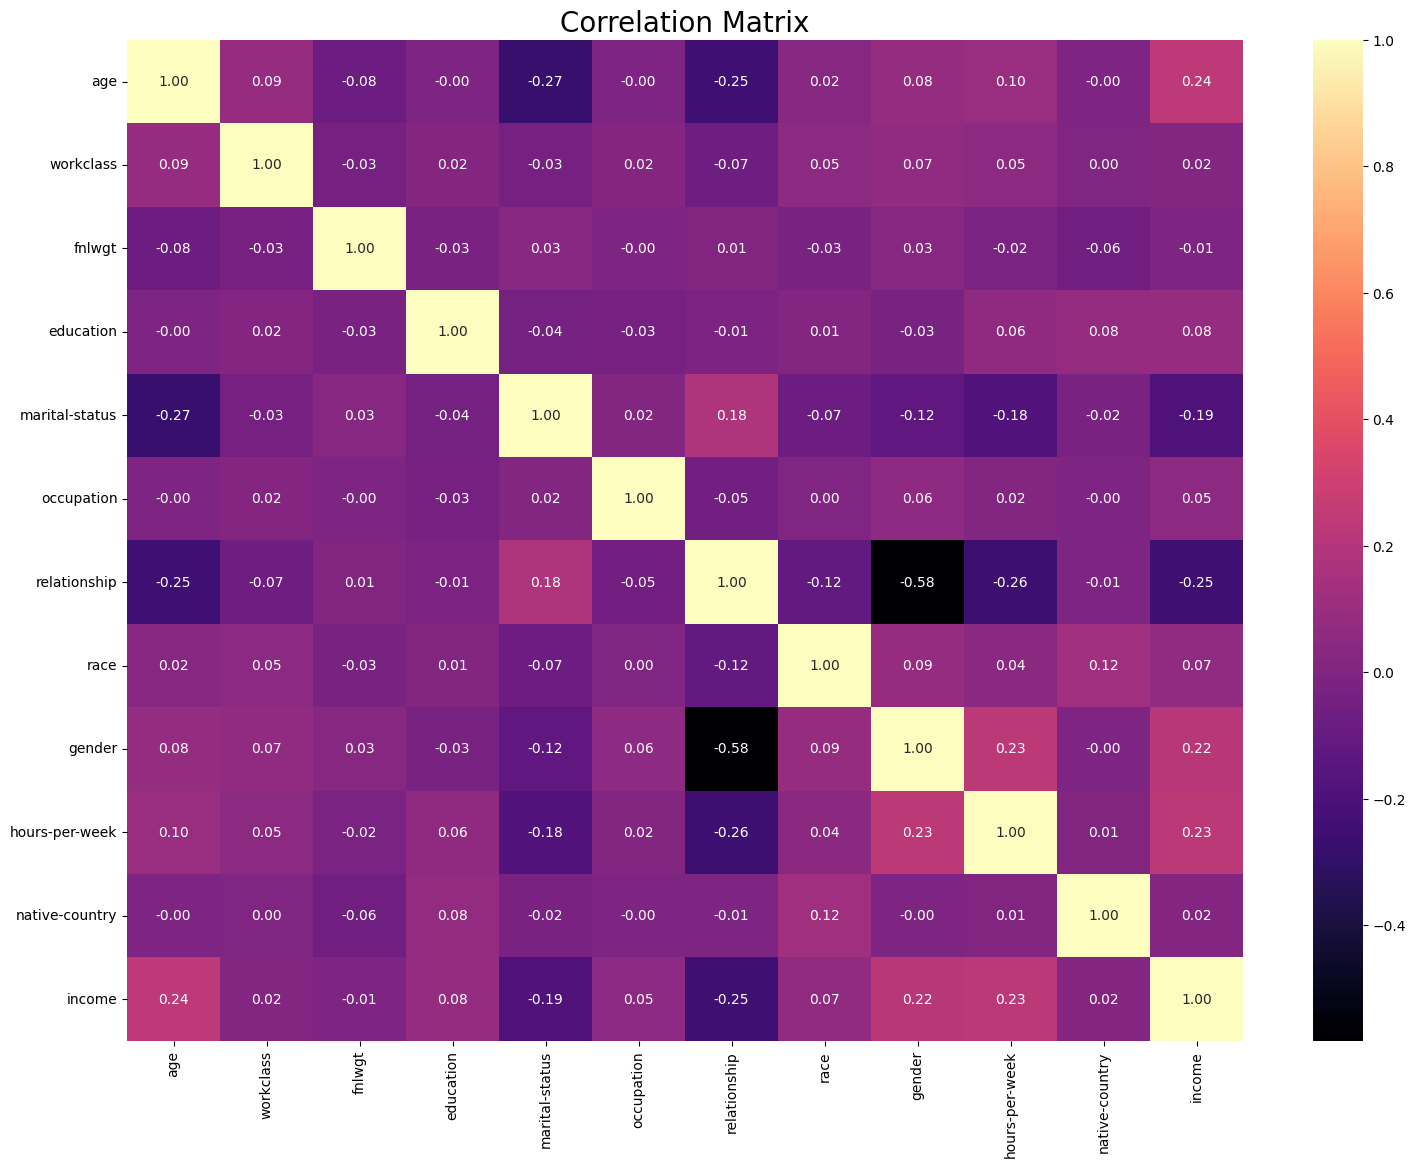

In [19]:
# Correlation matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [20]:
 # The function takes a dataframe (df) and the variable of interest as arguments.
def diagnostic_plots(df, variable,target):
   
    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

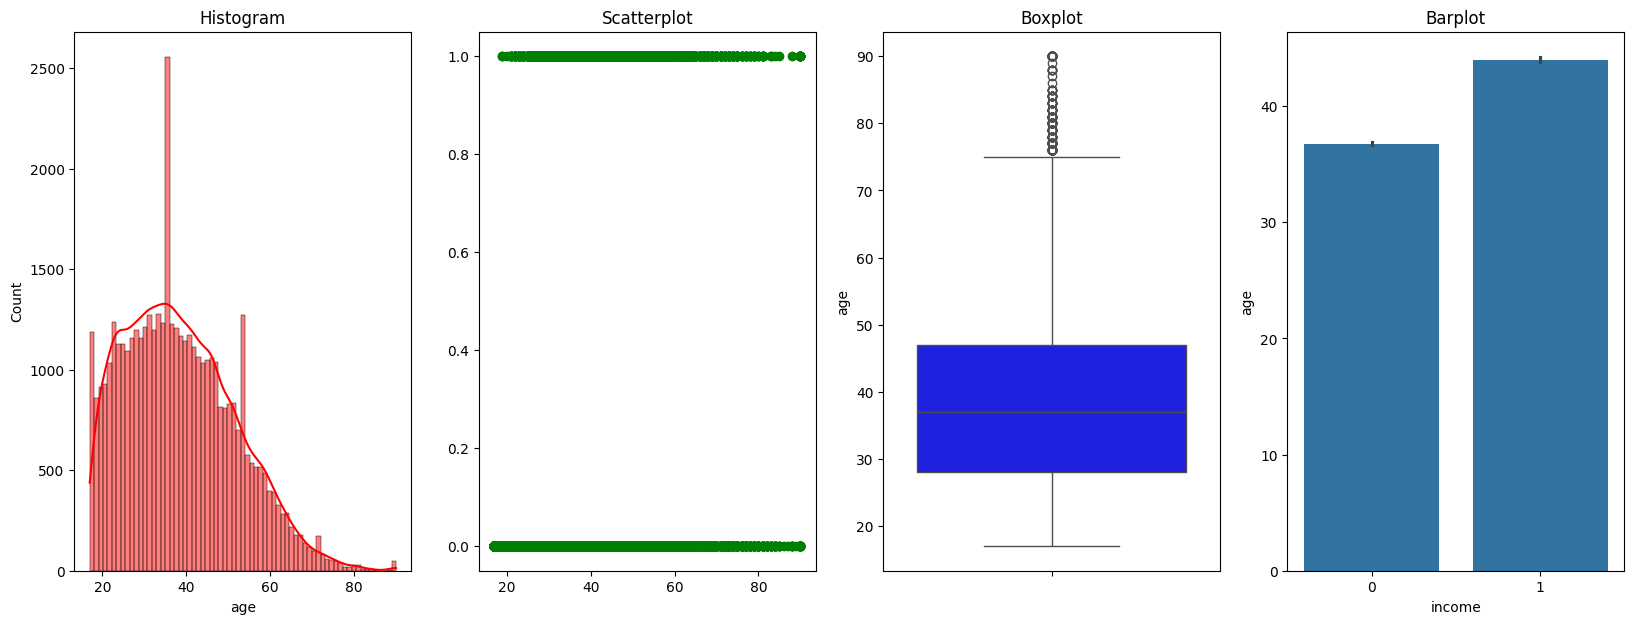

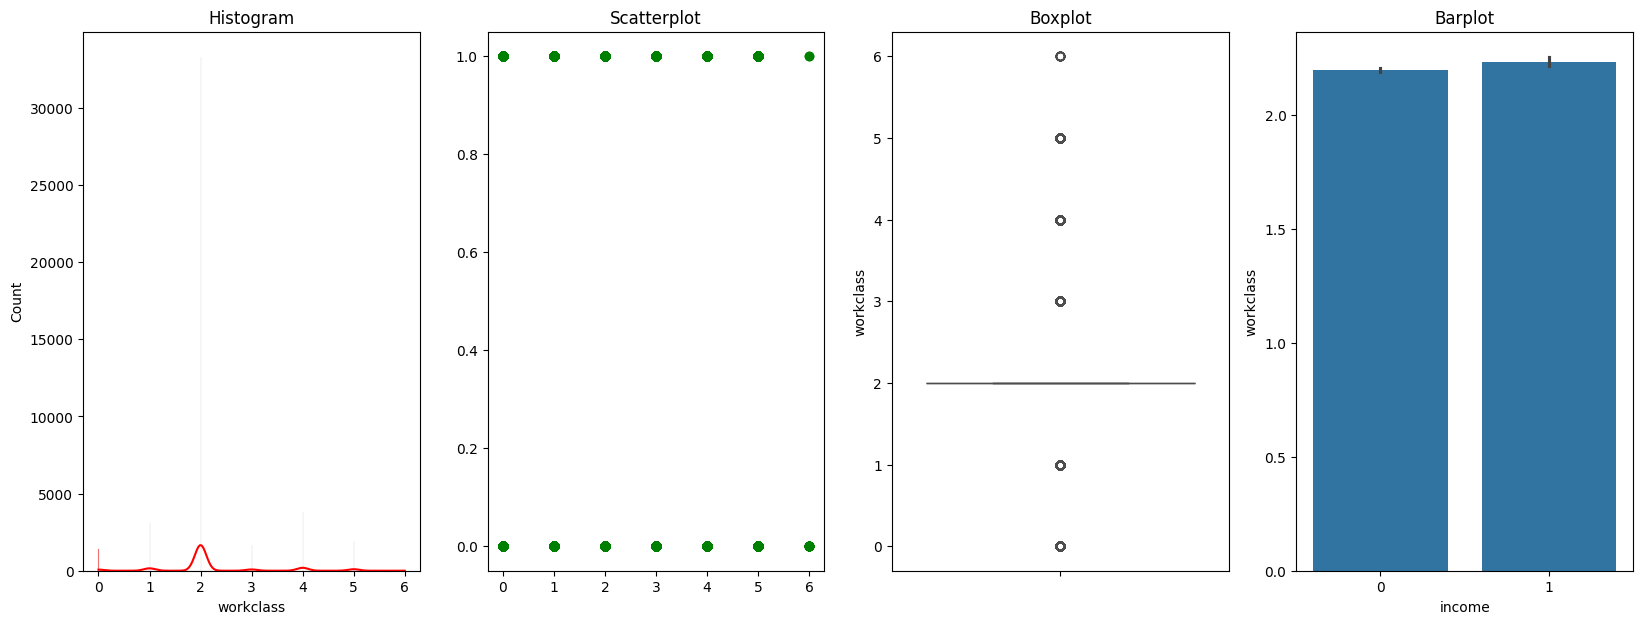

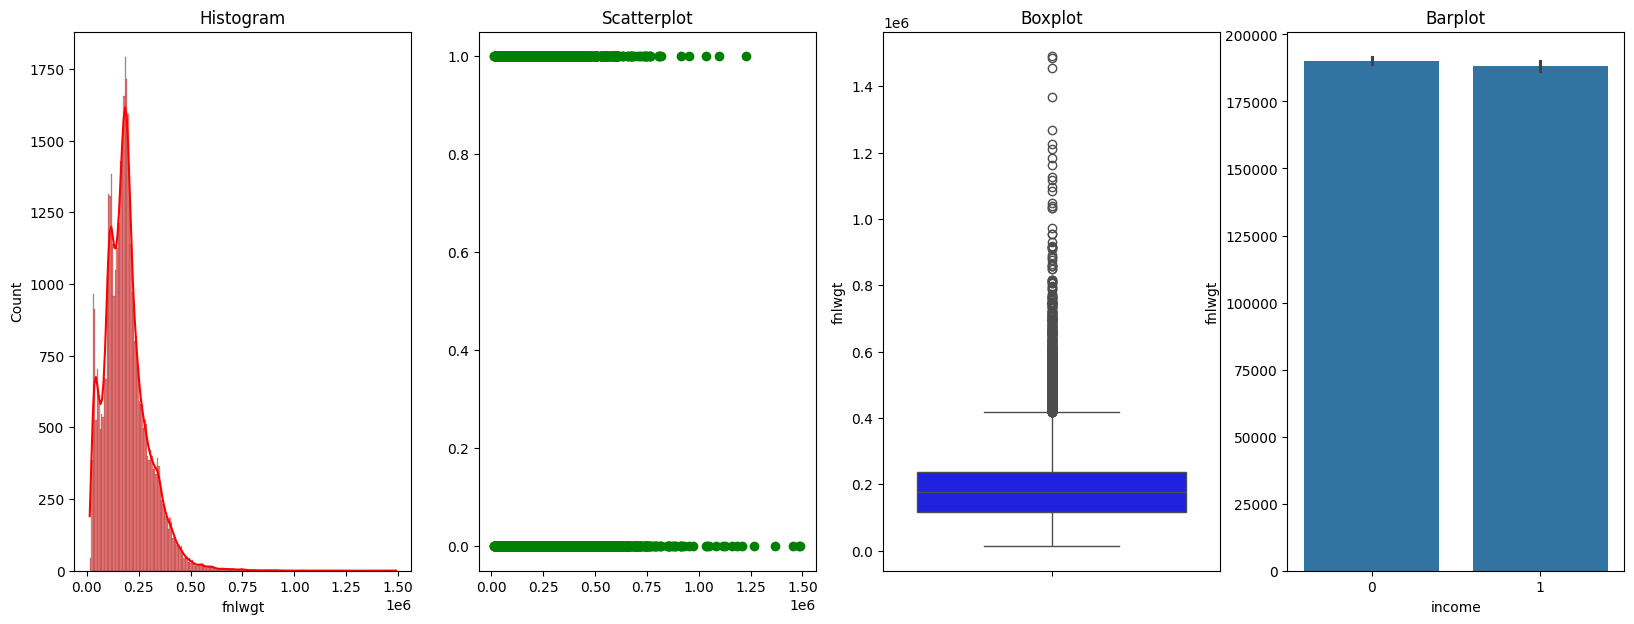

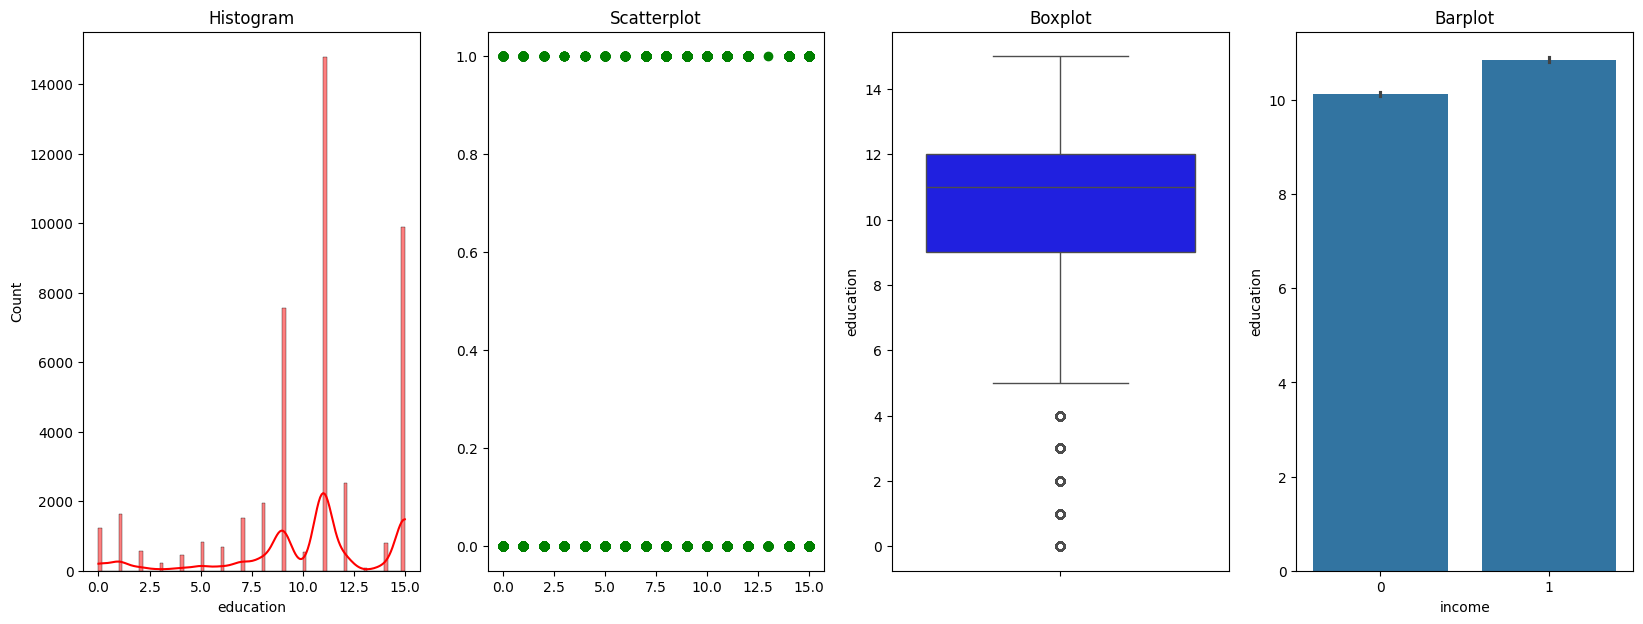

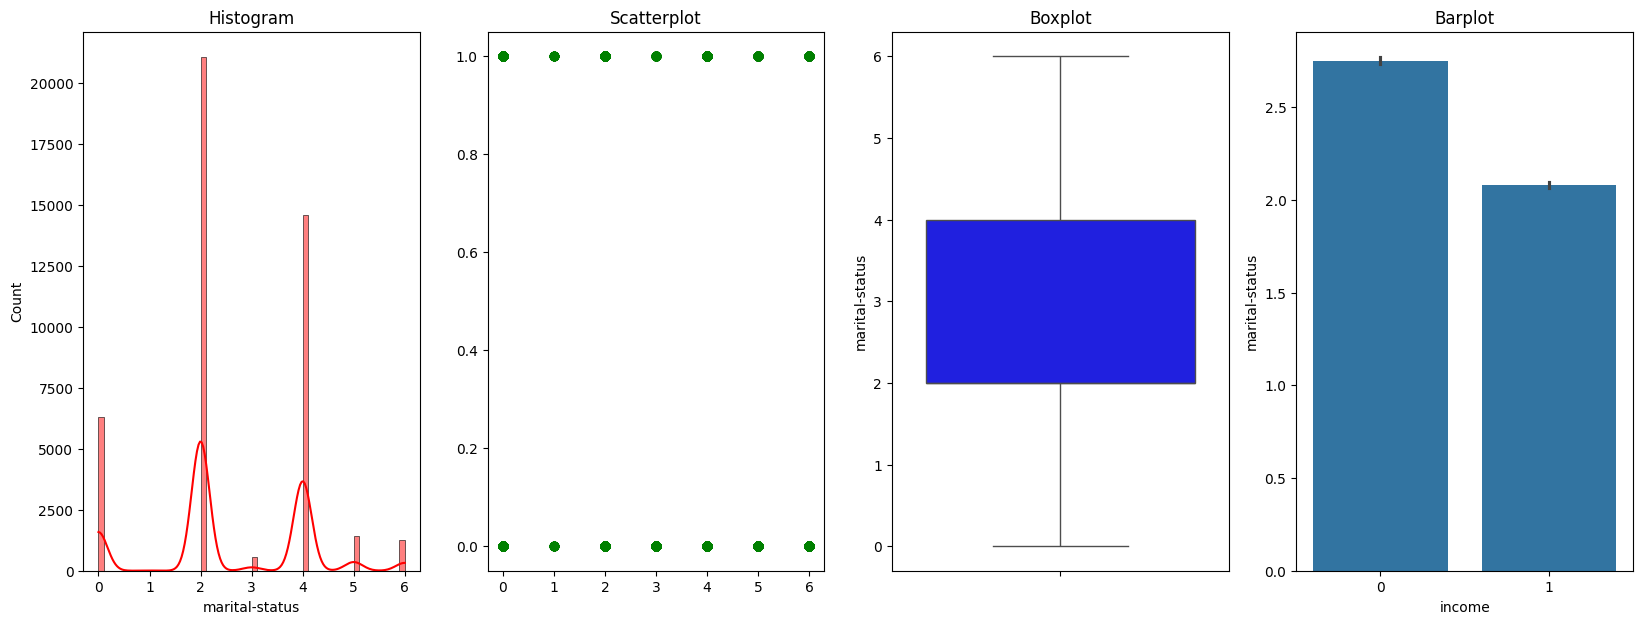

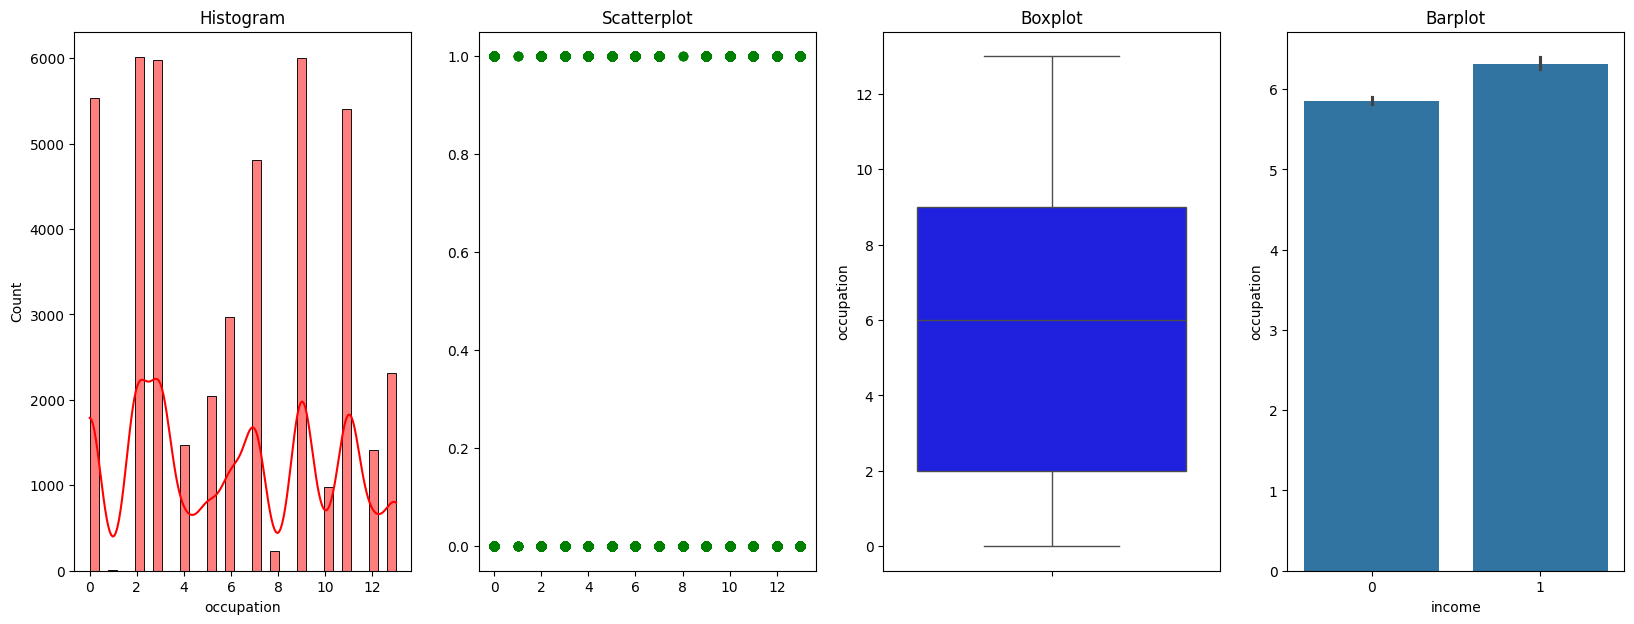

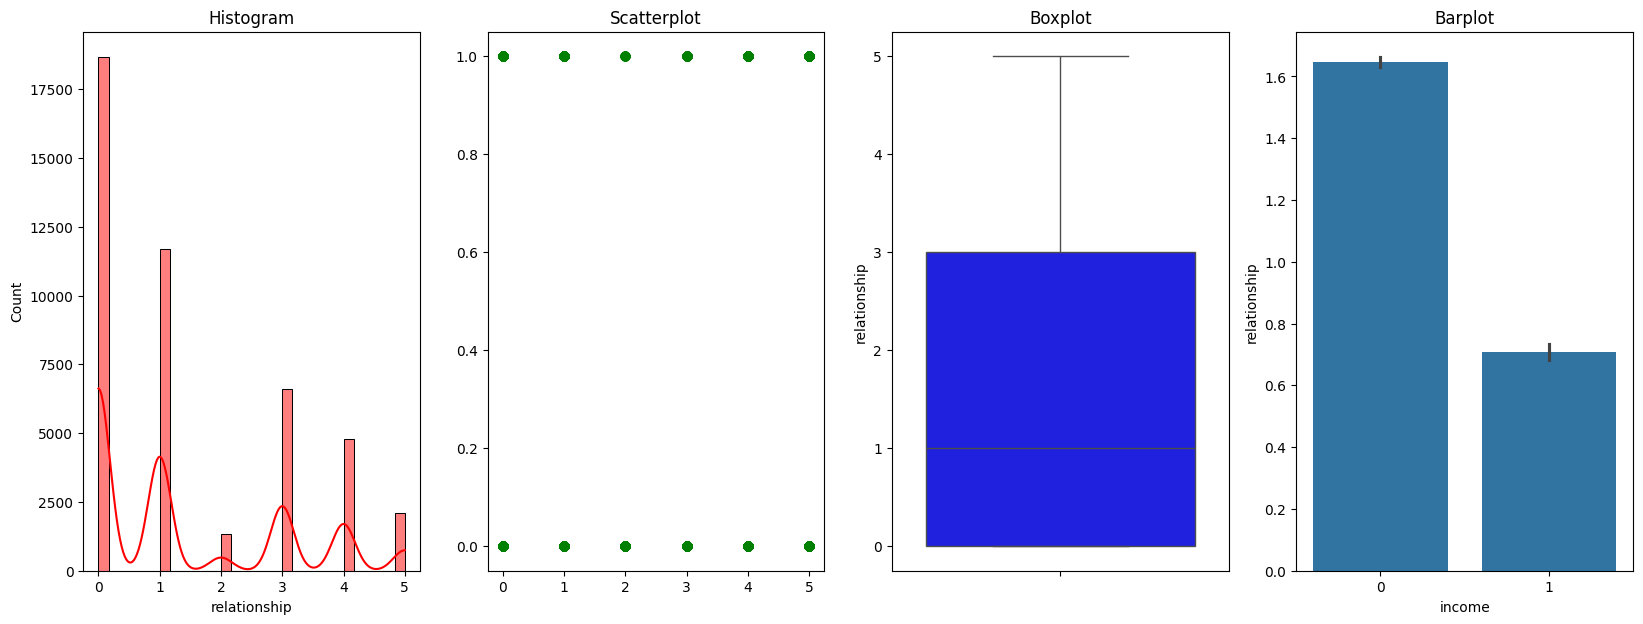

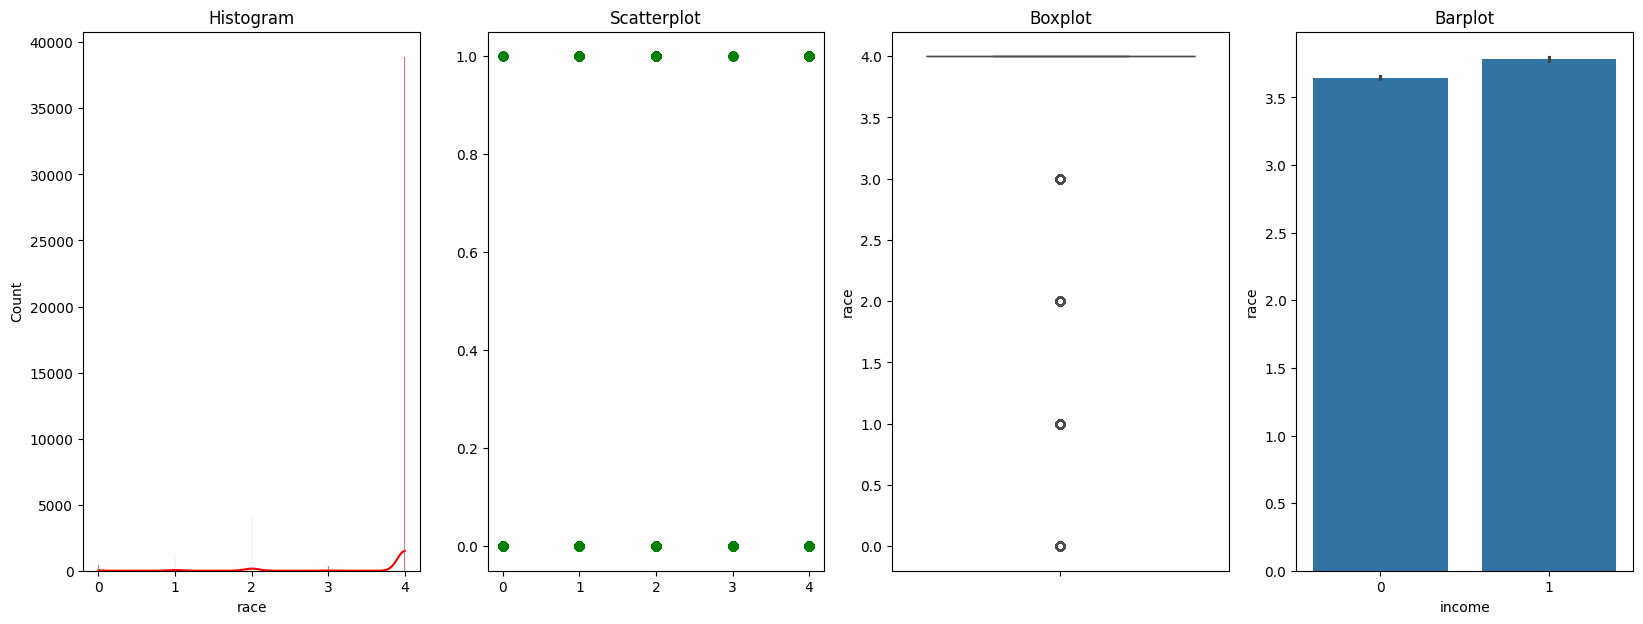

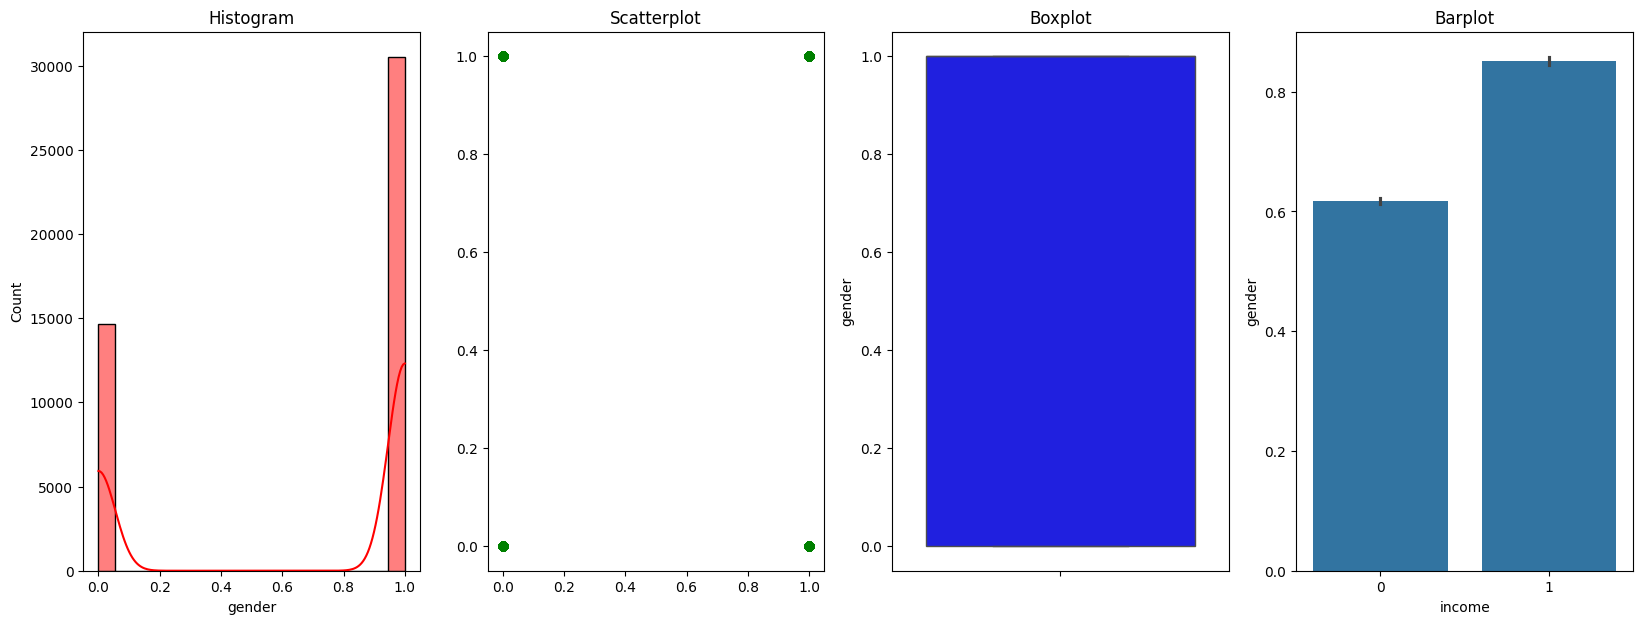

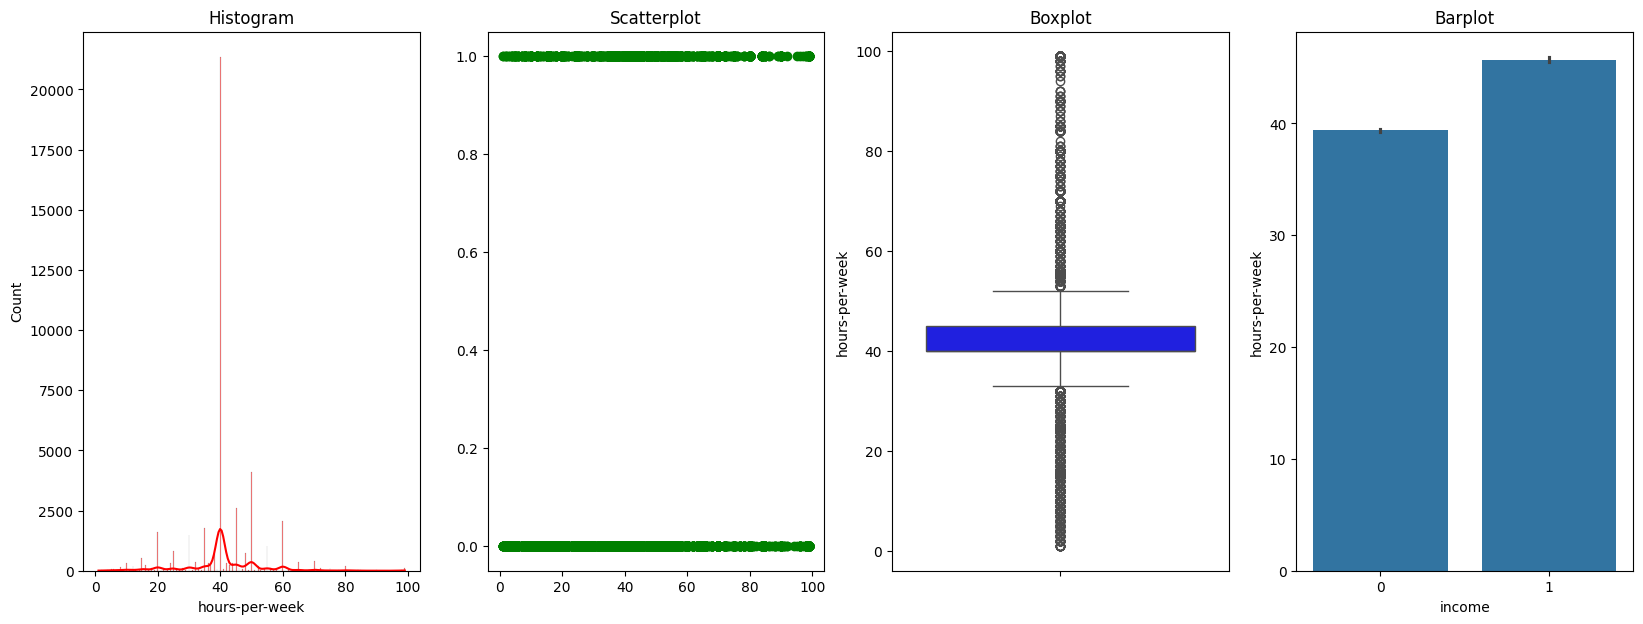

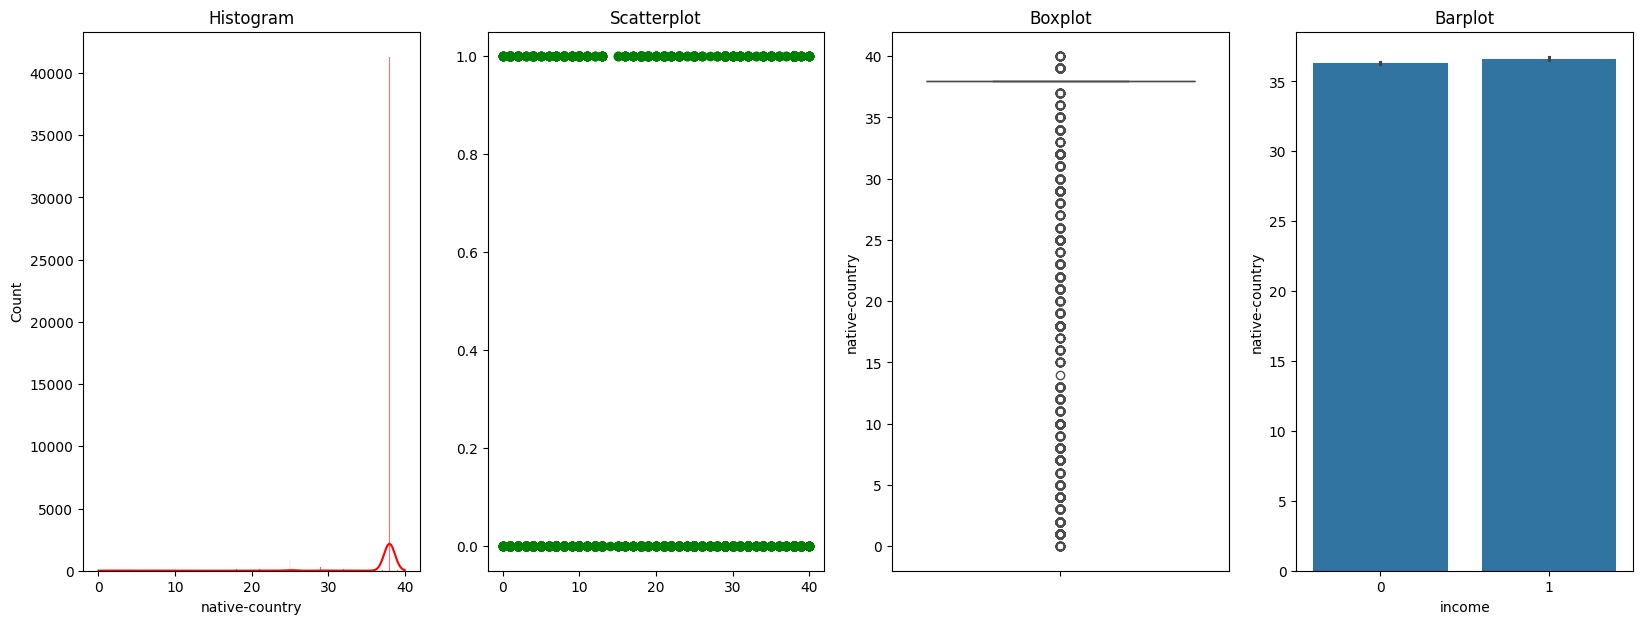

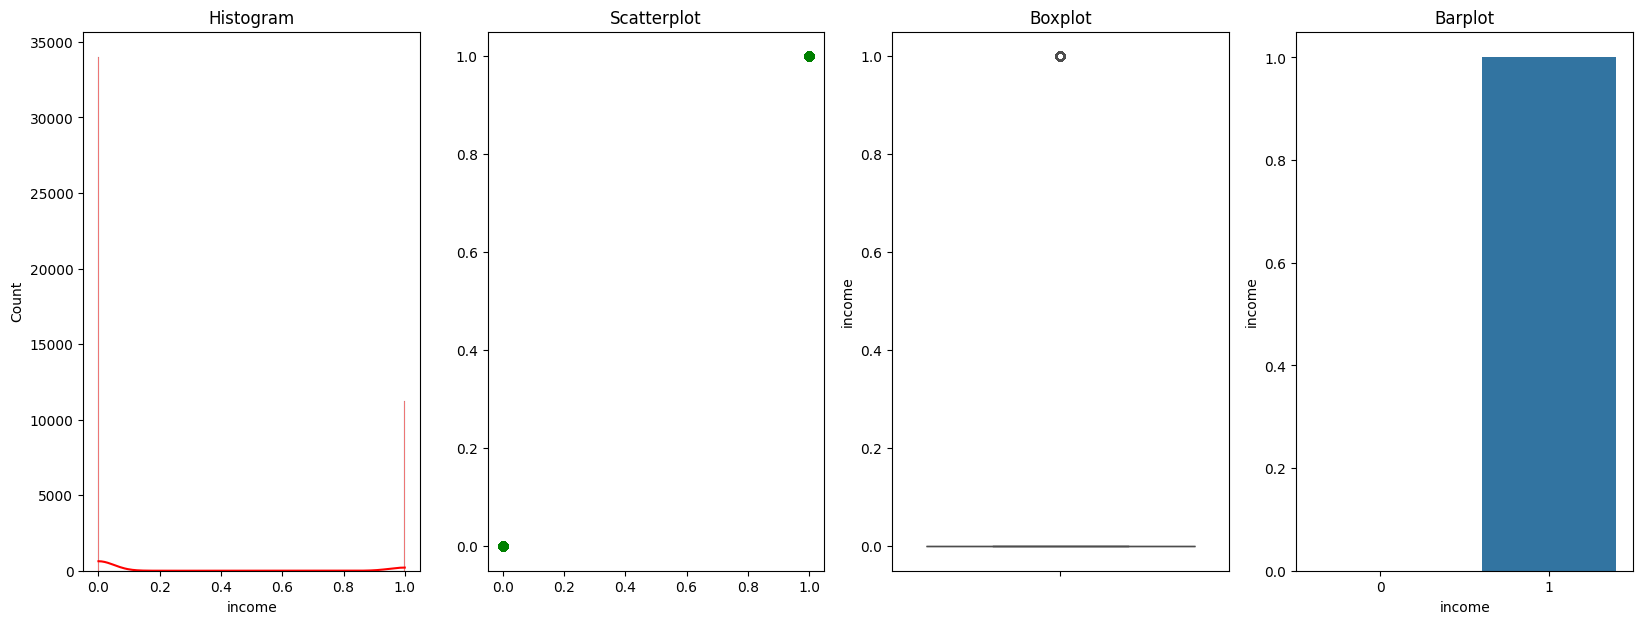

In [21]:
for col in df1:
    diagnostic_plots(df1,col,'income')

# Model

In [22]:
# split Data
X = df1.drop(columns={"income"},axis=1)
y =df1["income"].values.reshape(-1,1) #target

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40657, 11)
y_train shape: (40657, 1)
X_test shape: (4518, 11)
y_test shape: (4518, 1)


### Scaling Data

In [24]:
st =MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

## KNN

In [25]:
#Find Best K 
K = 20
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))


### Plotting

Text(0.5, 1.0, 'accuracy vs K')

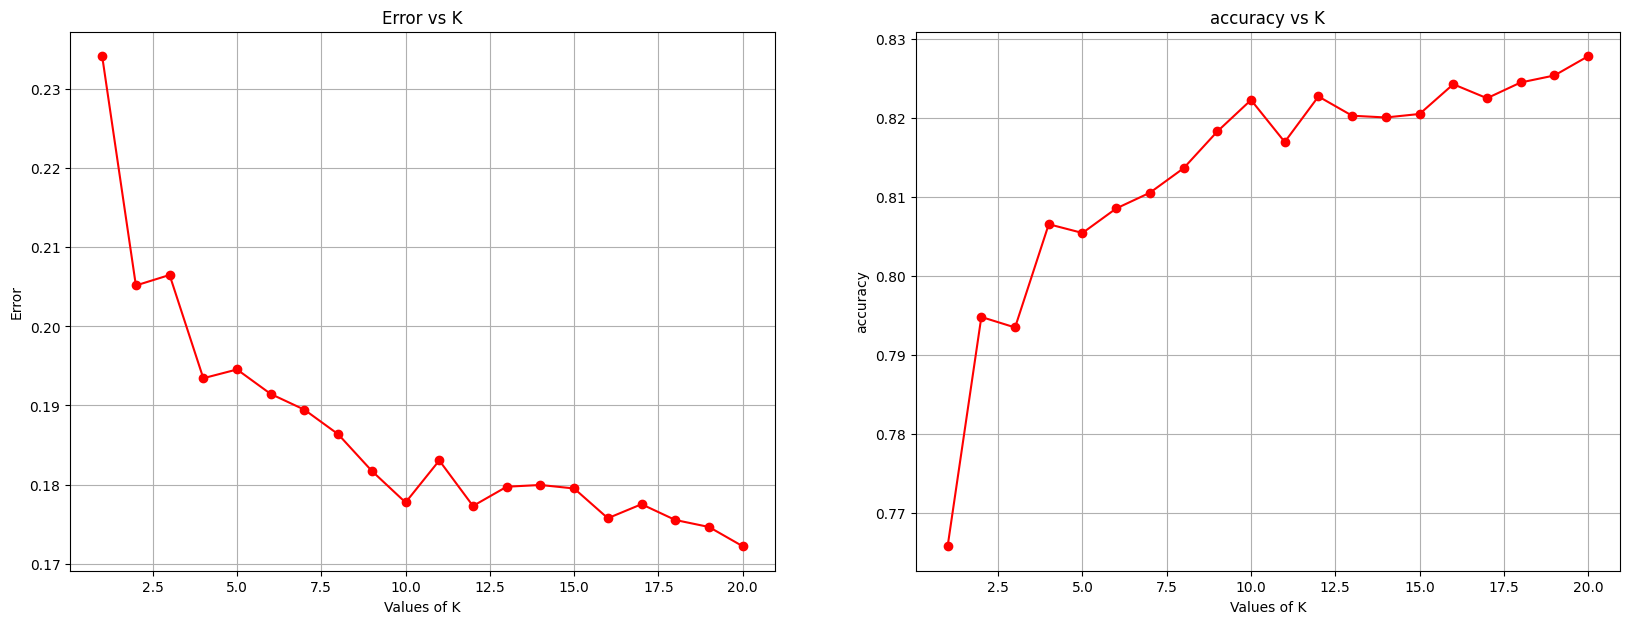

In [26]:

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,21),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,21),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

In [27]:
K=20
clf= KNeighborsClassifier(K)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.8277999114652501


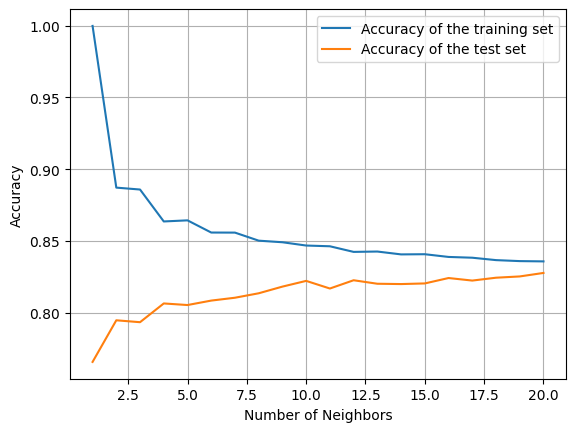

In [28]:
#Find Best K 
training_acc = []
test_acc = []

# try KNN for different K nearest neighbor from 1 to 30
neighbors_setting = range(1,21)
for n_neighbors in neighbors_setting:
    knn= KNeighborsClassifier(n_neighbors= n_neighbors, )
    knn.fit(X_train,y_train.ravel())
    training_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

plt.plot(neighbors_setting,training_acc,label='Accuracy of the training set')
plt.plot(neighbors_setting,test_acc,label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()
plt.show()

“Which value of K (number of nearest neighbors) between 1 and 29 gives the best performance?”

Setting	Meaning
    estimator=knn	Use K-Nearest Neighbors model
    param_grid	Try all K values from 1 → 29
    scoring='accuracy'	Measure how accurate the model is
    cv=10	Use 10-fold cross-validation
    n_jobs=-1	Use all CPU cores

For each K value, GridSearch does:

    Split training data into 10 folds

    Train on 9 folds

    Validate on 1 fold

    Repeat this 10 times

    Compute average accuracy

In [ ]:
#Find Best K 
# Note this code may take up to 2min to run
parameters = {"n_neighbors":range(1,30)}
grid_kn=GridSearchCV(estimator=knn,#model
                     param_grid=parameters, #range of K
                    scoring='accuracy',# Strategy to evaluate the performance of the cross-validation model on the test set.
                    cv= 10, # Cross-validation generator
                    verbose= 1, #Time to calculate
                    n_jobs= -1 # Use all CPU cores
                    )
grid_kn.fit(X_train,y_train.ravel())

Fitting 10 folds for each of 29 candidates, totalling 290 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsCla..._neighbors=20)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': range(1, 30)}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",10
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidat

In [30]:
grid_kn.best_params_

{'n_neighbors': 26}

In [31]:
print(
"""    
| K      | Mean CV Accuracy |
| ------ | ---------------- |
| 3      | 0.81             |
| 7      | 0.84             |
| 15     | 0.86             |
| 20     | 0.87             |
| **26** | **0.88 ← BEST**  |
| 29     | 0.87             |
"""
)

    
| K      | Mean CV Accuracy |
| ------ | ---------------- |
| 3      | 0.81             |
| 7      | 0.84             |
| 15     | 0.86             |
| 20     | 0.87             |
| **26** | **0.88 ← BEST**  |
| 29     | 0.87             |



GridSearch simply picks the highest average score.

This means : K = 26 produced the highest average accuracy across all 10 folds

## Key interpretation:

Smaller K (like 1–5):

    - Very sensitive to noise

    - Overfits the data

Larger K:

    - Smoother decision boundary

    - Better generalization

At K = 26,  model achieved the best balance between bias and variance.


Intuition: Why a large K worked here

    Dataset likely has:

        ✔ Many data points
        ✔ Some noise
        ✔ Mixed categorical features (encoded numerically)

So:

    Using more neighbors reduces the impact of noisy points

    Majority voting becomes more stable

That’s why 26 neighbors worked better than smaller values.